In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [39]:
#from platform import python_version
#python_version()

In [40]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

In [41]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Berkeley_23'

In [42]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec

(98.30833, 20.53056)

In [43]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [44]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [45]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.2))'
query

"SELECT \nra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b\nFROM gaiadr3.gaia_source\nWHERE 1=CONTAINS(POINT('ICRS',ra,dec),\nCIRCLE('ICRS', 98.30833,20.53056, 0.2))"

In [46]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [47]:
data = job.get_results()

In [48]:
len(data)

5423

In [49]:
data = job.get_results()

In [50]:
data#.show_in_notebook()

ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
deg,deg,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mas,mas,km / s,km / s,deg,deg
float64,float64,float64,float32,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64
98.3519753646501,20.33489212562049,-0.38856999778109336,0.17354362,-1.3659088749018151,0.12271239,1.4523678,17.887228,0.41736182757172874,0.14571296,--,--,192.78873138686419,5.328889923425866
98.35396630489257,20.33875391925055,1.4405068937426817,0.27461368,-0.6304284757947524,0.2034049,1.2074089,18.659582,0.2795127704139192,0.24347599,--,--,192.78612613133595,5.332306025423972
98.35005464165842,20.34186248269788,0.8599048006219591,0.025661808,-2.641192928067422,0.020173289,0.67087746,14.261889,0.5850682941168022,0.024479946,--,--,192.78167233294792,5.330448475713683
98.40508471928254,20.35254997549366,0.5393762600078092,0.35251927,0.1211987557512413,0.246421,1.1981354,18.868177,-0.16207688414666688,0.43745655,--,--,192.79561797168557,5.381277795666628
98.41149568652337,20.359127818776102,2.152265423386537,0.3700105,-1.1332864108910055,0.2630286,2.150219,18.876717,0.3982967438067359,0.35393482,--,--,192.79246767088588,5.389617964664992
98.41493338052611,20.359483505848377,1.3847377108276624,0.15908511,-0.43032368681693584,0.1148056,1.1229782,17.652752,0.13824443934432543,0.13457525,--,--,192.79361737908457,5.392651722747021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98.20366858027798,20.695968054075458,0.20211844563160286,0.08243584,0.3748527236946139,0.057633728,1.0146589,16.622982,0.37112875522970395,0.08702088,--,--,192.40226639932413,5.3690388656294585


In [51]:
df = data.to_pandas()
df

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


In [52]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

-2.379367479303158 0.3661494255065918
0.28730170694035606 0.4801464378833771


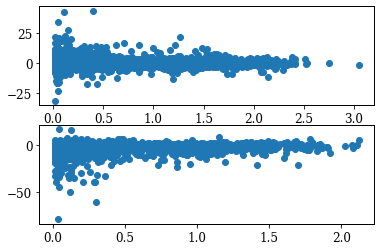

In [53]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [54]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error

In [55]:
teste = df.drop(df[condicao|condicao2].index)
teste

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
5,98.414933,20.359484,1.384738,0.159085,-0.430324,0.114806,1.122978,17.652752,0.138244,0.134575,NaN,NaN,192.793617,5.392652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,98.203473,20.695607,1.116447,0.316007,2.855067,0.220632,NaN,18.824085,0.134882,0.370492,NaN,NaN,192.402507,5.368712
5413,98.204357,20.698605,NaN,NaN,NaN,NaN,1.848768,20.255661,NaN,NaN,NaN,NaN,192.400200,5.370810
5415,98.212834,20.700573,0.737448,0.107377,-1.143325,0.072743,1.008522,16.962452,0.113917,0.109652,NaN,NaN,192.402055,5.378769
5417,98.203669,20.695968,0.202118,0.082436,0.374853,0.057634,1.014659,16.622982,0.371129,0.087021,NaN,NaN,192.402266,5.369039


In [56]:
df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(2030, 5423)

In [57]:
ndf = df.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


In [58]:
x = ndf['pmra']
y = ndf['pmdec']

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

In [60]:
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
jpt = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]
#X = StandardScaler().fit_transform(Xis)

0.20864083386376095


<Figure size 360x360 with 0 Axes>

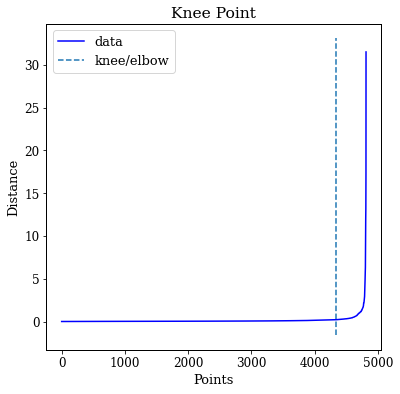

In [61]:
from sklearn.neighbors import NearestNeighbors
vizinhos = np.sqrt(len(data)).astype(int)
nn = NearestNeighbors(n_neighbors=vizinhos).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


eps_opt = distances[knee.knee]
nmin = int(0.005*len(data))

print(distances[knee.knee])

Estimated no. of clusters: 1
Estimated no. of noise points: 4548
Estimated no. points clustered: 264


Text(0, 0.5, '$x_2$')

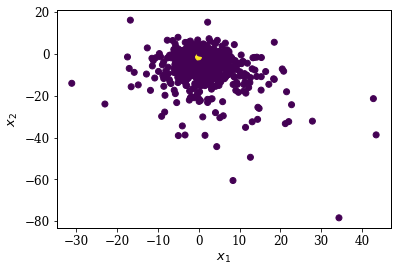

In [62]:
jpt = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['b'],ndf['l'],ndf['parallax']))[0]
db = DBSCAN(eps=eps_opt, min_samples=nmin).fit(jpt)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

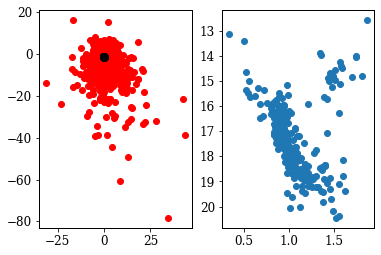

In [63]:
pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


fig, ax = plt.subplots(1,2)
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')

len(xin), len(xout)

subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

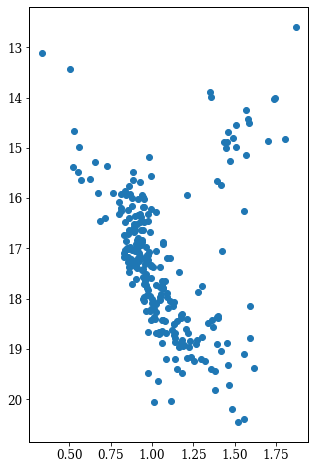

In [64]:
subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

plt.figure(figsize=(5,8))
plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

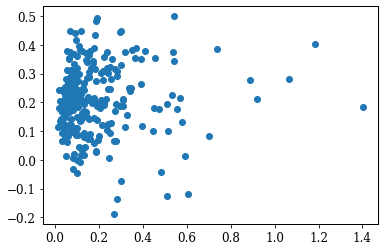

In [65]:
plt.scatter(subset['parallax_error'],subset['parallax'])

In [66]:
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors

#.Criando um catalogo com as coordenadas RA e DEC das estrelas

catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2


In [67]:
med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

#.estimativa do centro em DEC
med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5


Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

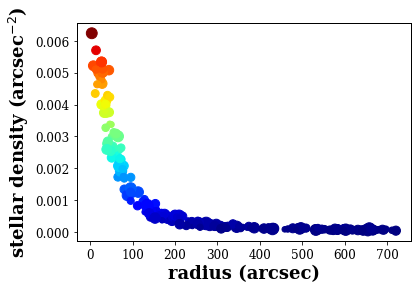

In [68]:
center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



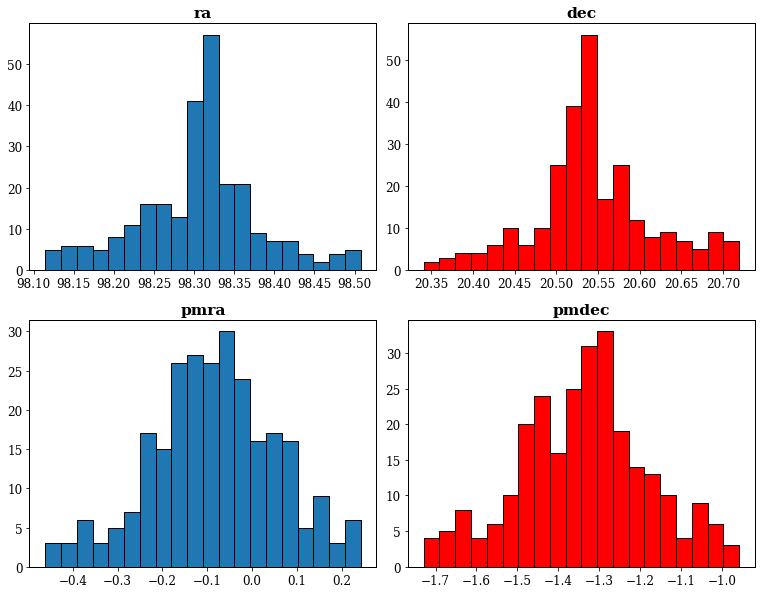

In [69]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

ax1.hist(subset['ra'], 20,  ec = 'k');
ax2.hist(subset['pmra'], 20,  ec = 'k');

ax3.hist(subset['dec'], 20,  ec = 'k', color = 'red');
ax4.hist(subset['pmdec'], 20,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


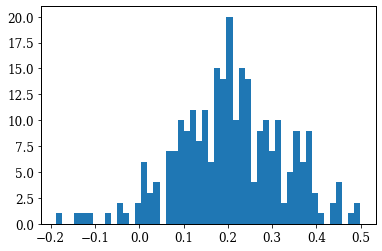

In [70]:
plt.hist(subset['parallax'], 50);

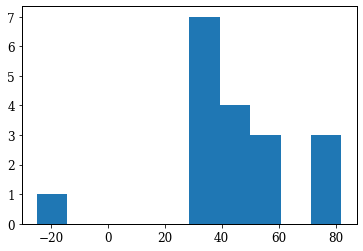

In [76]:
#subset.dropna(how='any',subset=['radial_velocity'])
plt.hist(subset.radial_velocity, 10);